In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

# Running and Visualizing One Simulation

In [2]:
weeks_run = 15
run_mode = 'Baseline'
simulation_df = invasion_main(run_mode, weeks_run) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Cook,0.1,0.206855,0.315393,0.662712,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,DuPage,0.0,0.069271,0.366084,0.895548,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Kane,0.3,0.310602,0.469694,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Will,0.0,0.127696,0.344385,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Winnebago,0.0,0.000000,0.417960,0.463727,0.805401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.818843,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000000,0.000406,0.002415,0.004170,0.021799,0.043210,0.054578,0.000000,0.276006,0.519398,0.783282,0.964231,1.000000,1.000000,0.970631
98,Calhoun,0.0,0.000020,0.004369,0.000000,0.239492,0.589501,0.670435,0.893028,1.000000,1.000000,1.000000,1.000000,1.000000,0.542442,0.864736,1.000000
99,Schuyler,0.0,0.000385,0.002299,0.003295,0.022845,0.045341,0.080956,0.096896,0.408552,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100,Gallatin,0.0,0.000000,0.000000,0.000570,0.000704,0.016127,0.018672,0.000000,0.076637,0.236212,0.584193,1.000000,1.000000,0.317919,1.000000,1.000000


In [3]:
def make_visual_df(simulation_df):
    visual_df = simulation_df.T
    visual_df.columns = visual_df.iloc[0]
    visual_df = visual_df.drop(visual_df.index[0])
    return visual_df

visual_df = make_visual_df(simulation_df)
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.206855,0.069271,0.310602,0.127696,0.0,0.165786,0.073906,0.0,0.023137,0.504705,...,0.000124,0.001074,0.0,0.0,0.000057,0.0,0.00002,0.000385,0.0,0.0
Week 2,0.315393,0.366084,0.469694,0.344385,0.41796,0.220478,0.160184,0.0,0.312924,0.530392,...,0.000595,0.018464,0.000058,0.000713,0.000328,0.000406,0.004369,0.002299,0.0,0.0
Week 3,0.662712,0.895548,1.0,1.0,0.463727,0.579083,0.290482,0.119846,1.0,0.528752,...,0.007164,0.019091,0.02548,0.001818,0.0,0.002415,0.0,0.003295,0.00057,0.000005
Week 4,1.0,1.0,1.0,1.0,0.805401,0.502554,1.0,0.191956,1.0,0.696371,...,0.076976,0.033982,0.099975,0.006495,0.0,0.00417,0.239492,0.022845,0.000704,0.00021
Week 5,1.0,1.0,1.0,1.0,1.0,0.85063,1.0,0.345641,1.0,0.983116,...,0.244342,0.010623,0.089465,0.041279,0.148511,0.021799,0.589501,0.045341,0.016127,0.0
Week 6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.59842,1.0,1.0,...,0.180777,0.096179,0.3221,0.0,0.290118,0.04321,0.670435,0.080956,0.018672,0.004161
Week 7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.85689,1.0,1.0,...,0.027328,0.674221,0.765703,0.032684,0.507047,0.054578,0.893028,0.096896,0.0,0.017558
Week 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.342031,1.0,0.727013,0.156823,0.9944,0.0,1.0,0.408552,0.076637,0.008798
Week 9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.94516,1.0,1.0,0.111896,1.0,0.276006,1.0,1.0,0.236212,0.072033


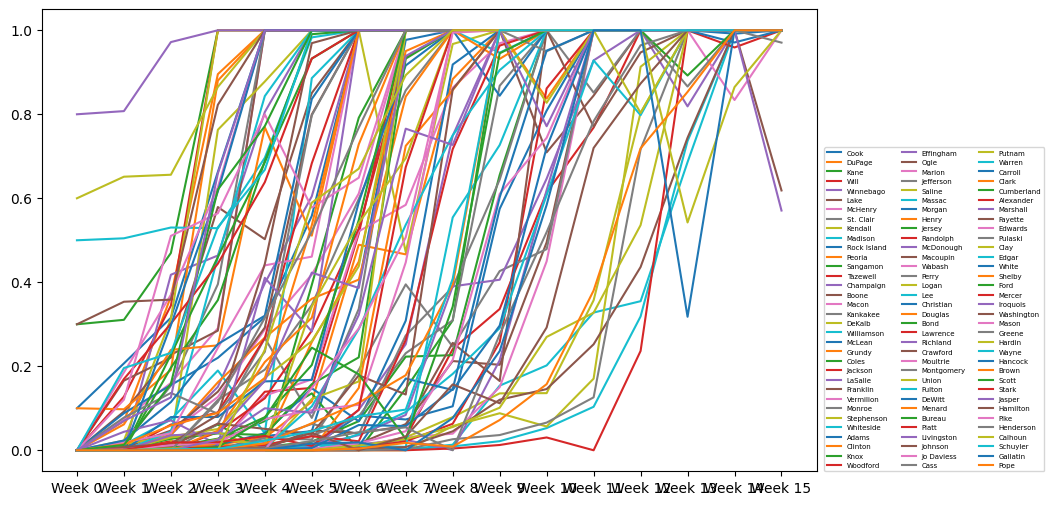

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)
        
    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')
    
    edge_colors = ['gray' if CG[src][tgt]['rel'] == 'interstate' else 'k' for src, tgt in CG.edges()]
    edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
    nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='800px'), max=15), Output()),…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500, max=15), Output()), _dom_classes=('widge…

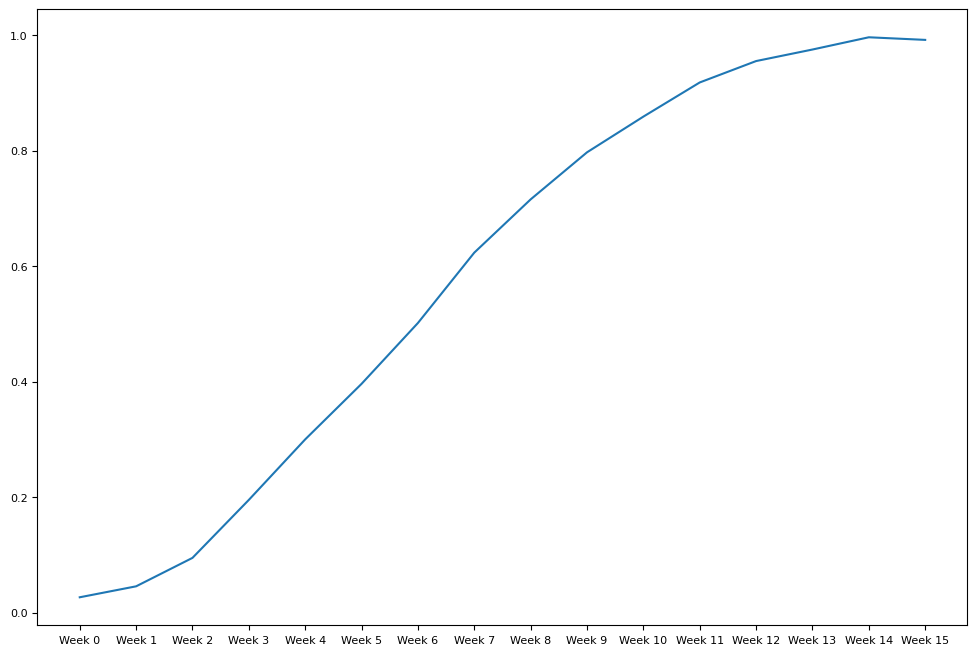

In [9]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

# Repeating the Simulation and Plotting the Results

In [10]:
def make_average_graphs(df):
    vis_df = make_visual_df(df)
    avg_df = vis_df.mean(axis=1)
    plt.plot(avg_df.index, 
             avg_df.iloc[0:, ],
             linewidth=0.5)

In [11]:
def model_variables(run_mode, sims_run, sim_weeks):
    plt.figure(figsize=(12,8))
    plt.tick_params(labelsize=8)
    
    for i in range(0, sims_run):
        df = invasion_main(run_mode, sim_weeks)
        make_average_graphs(df)
    
    plt.show()

sims_run = 50  # RIP my RAM
sim_weeks = 15

# model_variables('Baseline', sims_run, sim_weeks)

# Model Variables

In [12]:
# widgets.interact(model_variables,
#     run_mode =['Baseline', 'Eliminate ToH', 'Population-Based Countermeasures', 'Quarantine'],
#     sims_run = (10, 50, 10),
#     sim_weeks = (1, 30, 1),
#     value='Baseline',
#     disabled=False,

# )

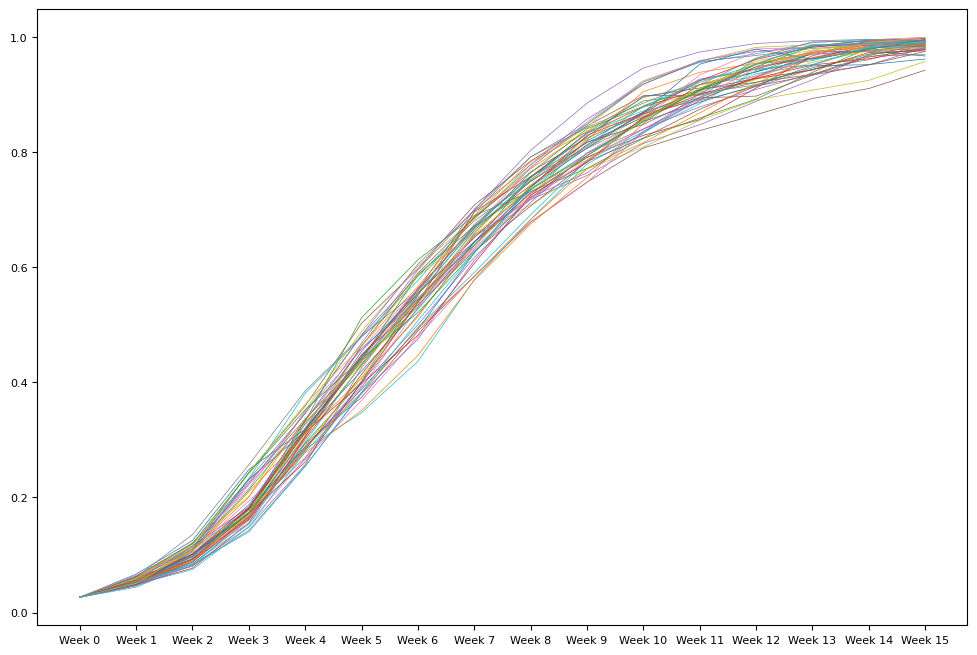

In [13]:
model_variables('Baseline', sims_run, sim_weeks)

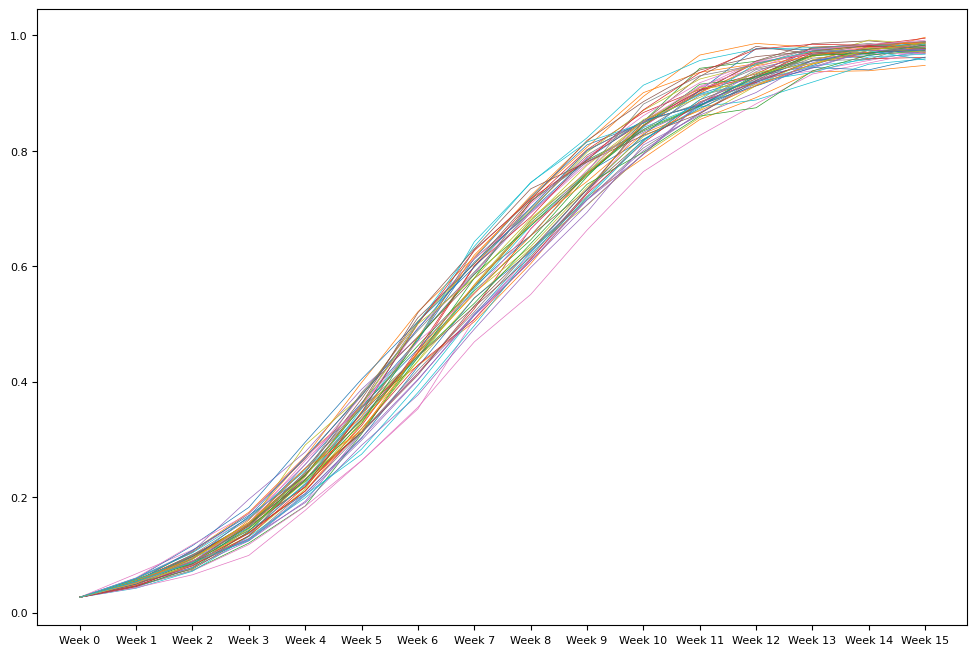

In [14]:
model_variables('Eliminate ToH', sims_run, sim_weeks)

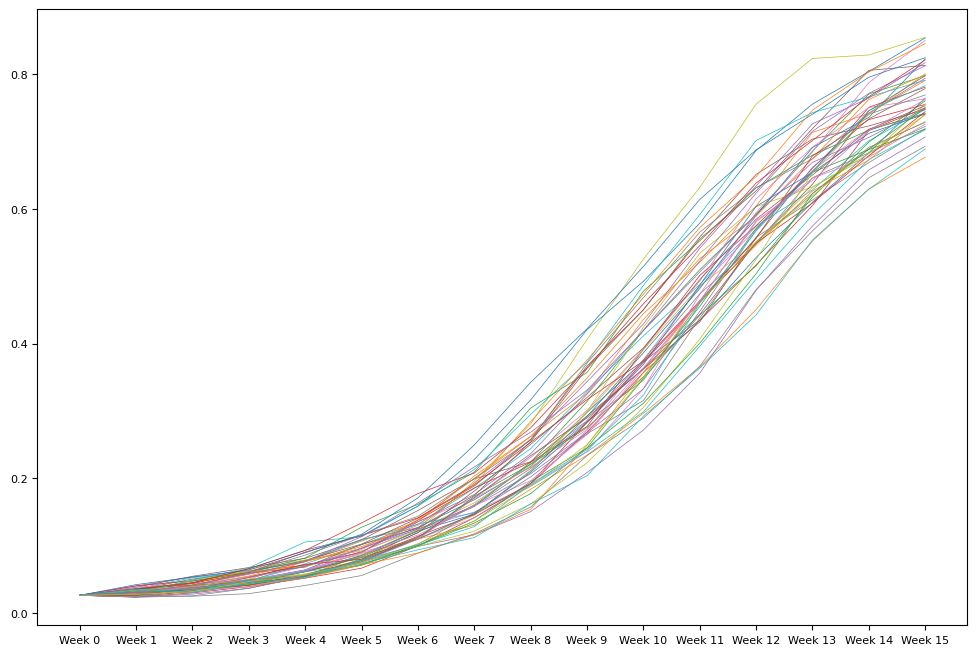

In [15]:
model_variables('Population-Based Countermeasures', sims_run, sim_weeks)

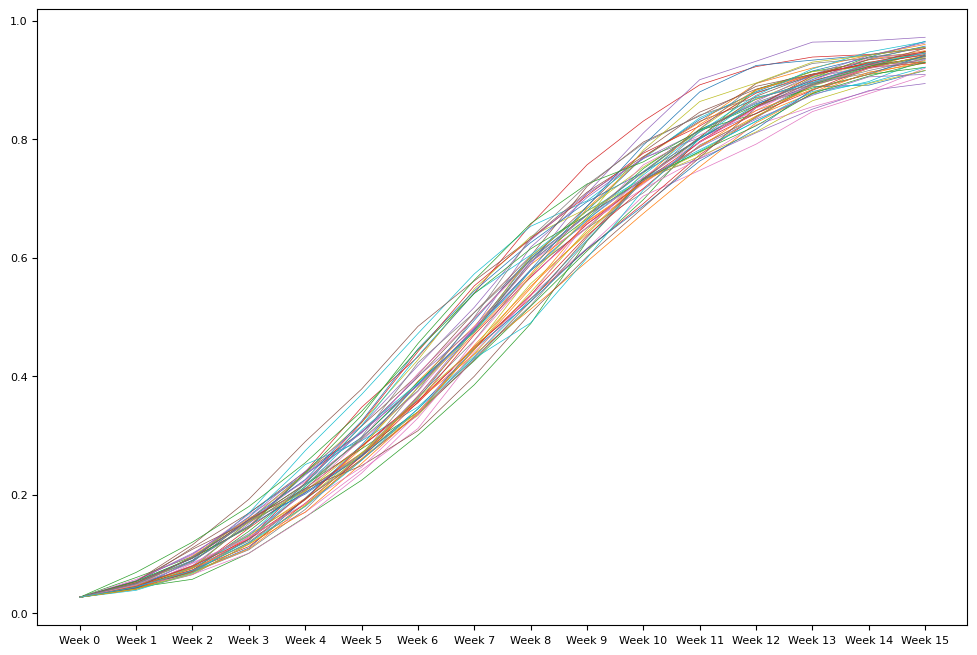

In [16]:
model_variables('Quarantine', sims_run, sim_weeks)

In [17]:
import seaborn as sns
import numpy as np
for i in range(100):
    print(np.random.choice([True, False]))
    # print(np.random.normal(0.3, 0.1) * 0.01)
# sns.kdeplot(np.random.normal(0.5, 0.8))

False
False
True
False
False
True
True
False
False
True
True
True
False
True
True
True
True
False
False
False
False
True
False
True
True
True
False
True
True
True
True
False
False
False
True
False
True
False
True
False
True
False
False
True
True
True
True
False
False
True
False
True
False
False
True
False
True
True
False
True
True
True
False
False
False
True
True
False
True
True
True
True
False
False
False
False
True
True
True
True
True
False
True
True
False
False
True
False
True
False
True
True
True
False
False
False
True
True
False
False
